In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load the training data
train_data = pd.read_csv("Train.csv")

# # Separate features and labels
# X = train_data.drop("Class", axis=1)
# y = train_data["Class"]

# Separate features and labels
X_train = train_data.drop("Class", axis=1)
y_train = train_data["Class"]


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA for dimensionality reduction
n_components = 125  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Feature selection using SelectKBest with ANOVA F-statistic
k_best = SelectKBest(f_classif, k=35)  # Adjust the number of features as needed
X_train_selected = k_best.fit_transform(X_train_pca, y_train)

In [ ]:
# Define and train an Artificial Neural Network (ANN)
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train_selected.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the model
model.fit(X_train_selected, y_train, epochs=10, batch_size=64)

Epoch 1/10
28/28 [==============================] - 1s 3ms/step - loss: 0.5615
Epoch 2/10
28/28 [==============================] - 0s 3ms/step - loss: 0.2889
Epoch 3/10
28/28 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 4/10
28/28 [==============================] - 0s 3ms/step - loss: 0.1819
Epoch 5/10
28/28 [==============================] - 0s 3ms/step - loss: 0.1885
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1777
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1660
Epoch 8/10
28/28 [==============================] - 0s 3ms/step - loss: 0.1713
Epoch 9/10
28/28 [==============================] - 0s 3ms/step - loss: 0.1616
Epoch 10/10
28/28 [==============================] - 0s 3ms/step - loss: 0.1603


In [ ]:
# Load the test data
test_data = pd.read_csv("Test.csv")

# Feature preprocessing for the test data (scaling, PCA, feature selection)
X_test_scaled = scaler.transform(test_data)
X_test_pca = pca.transform(X_test_scaled)
X_test_selected = k_best.transform(X_test_pca)

# Predict on the test data using the trained model
y_pred = model.predict(X_test_selected)

# Assuming you have the true labels for the test data
y_true = test_data.iloc[:, -1]# Replace "Class" with the actual column name for true labels

24/24 [==============================] - 0s 2ms/step


AUC Score: 0.8857901726427623


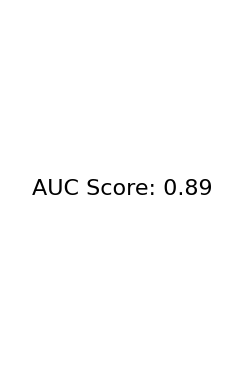

In [ ]:
# Calculate the AUC score
auc_score = roc_auc_score(y_true, y_pred)
print("AUC Score:", auc_score)

# Display the AUC score
plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, f'AUC Score: {auc_score:.2f}', fontsize=16, ha='center')
plt.axis('off')
plt.show()

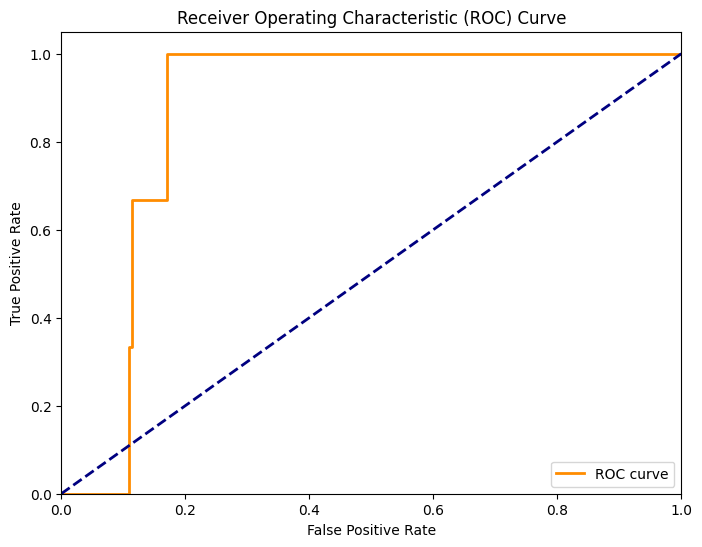

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


756


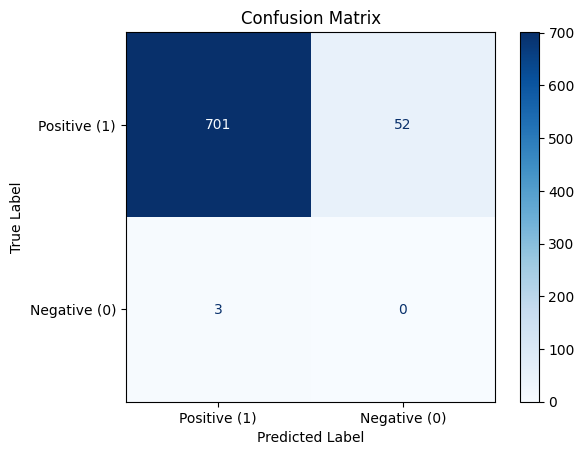

True Positives (TP): 701
False Positives (FP): 52
False Negatives (FN): 3
True Negatives (TN): 0


In [ ]:
# # Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, np.round(y_pred))
print(len(y_true))
# Define labels for the confusion matrix
display_labels = ['Positive (1)', 'Negative (0)']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
# Add the values for TP, FP, TN, FN in the cells
disp = disp.plot(cmap='Blues', values_format='d')

# Add labels to the x and y axes
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Extract TP, FP, TN, FN from the confusion matrix
TP, FP, FN, TN = conf_matrix.ravel()
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")